## Test the recovery of curved-sky power spectra with Gaussian mocks

In [1]:
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import cm
from astropy.io import fits
from astropy.table import Table, vstack
import healpy as hp
from pixell import enmap
import pymaster as nmt
import copy
%matplotlib inline
sys.path.append('/Users/Andrina/Documents/WORK/ACTxHSC/scripts/')
import MockSurvey_parallel
reload(MockSurvey_parallel)
from MockSurvey_parallel import MockSurveyParallel

In [2]:
matplotlib.rcParams['lines.linewidth'] = 1.0
matplotlib.rcParams['lines.linestyle'] = '-'  
matplotlib.rcParams['lines.color'] = 'black'
 
#fonts & text
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['font.weight'] = 'normal'
matplotlib.rcParams['font.size'] = 12.0
matplotlib.rcParams['text.color'] = 'black'
matplotlib.rcParams['text.usetex'] = True
 
#axes & ticks
matplotlib.rcParams['axes.edgecolor'] = 'black'
matplotlib.rcParams['axes.linewidth'] = 1.0  
matplotlib.rcParams['axes.grid'] = False
matplotlib.rcParams['axes.titlesize'] = 'x-large'
matplotlib.rcParams['axes.labelsize'] = 'x-large'
matplotlib.rcParams['axes.labelweight'] = 'normal'
matplotlib.rcParams['axes.labelcolor'] = 'black'
matplotlib.rcParams['axes.formatter.limits'] = [-4, 4]
 
matplotlib.rcParams['xtick.major.size'] = 7
matplotlib.rcParams['xtick.minor.size'] = 4
matplotlib.rcParams['xtick.major.pad'] = 6
matplotlib.rcParams['xtick.minor.pad'] = 6
matplotlib.rcParams['xtick.labelsize'] = 'x-large'
matplotlib.rcParams['xtick.minor.width'] = 1.0
matplotlib.rcParams['xtick.major.width'] = 1.0
 
matplotlib.rcParams['ytick.major.size'] = 7
matplotlib.rcParams['ytick.minor.size'] = 4
matplotlib.rcParams['ytick.major.pad'] = 6
matplotlib.rcParams['ytick.minor.pad'] = 6
matplotlib.rcParams['ytick.labelsize'] = 'x-large'
matplotlib.rcParams['ytick.minor.width'] = 1.0
matplotlib.rcParams['ytick.major.width'] = 1.0
 
#legends
matplotlib.rcParams['legend.numpoints'] = 1
matplotlib.rcParams['legend.fontsize'] = 'x-large'
matplotlib.rcParams['legend.shadow'] = False
matplotlib.rcParams['legend.frameon'] = False

In [3]:
defaultcolor = "#4682b4"
d = np.linspace(0, 1, 5)

### Read in the theoretical power spectra:

In [4]:
path2theorycls = '../../data/'

cl_gg = np.genfromtxt('../../data/cl_gg.txt', usecols={1})

ncl_gg = np.genfromtxt('../../data/ncl_gg.txt', usecols={1})

cl_gk = np.genfromtxt('../../data/cl_gk.txt', usecols={1})

cl_gs = np.genfromtxt('../../data/cl_gs.txt', usecols={1})

cl_kk = np.genfromtxt('../../data/cl_kk.txt', usecols={1})

ncl_kk = np.genfromtxt('../../data/ncl_kk.txt', usecols={1})

cl_ks = np.genfromtxt('../../data/cl_ks.txt', usecols={1})

cl_ss = np.genfromtxt('../../data/cl_ss.txt', usecols={1})

ncl_ss = np.genfromtxt('../../data/ncl_ss.txt', usecols={1})

ells_theory = cls_arr = np.genfromtxt('../../data/so_lsst_g_k_s.txt', usecols={0})

### Define parameters to run the mock survey

Define the basic parameters needed to run the mock survey

In [5]:
nrealis = 100

In [6]:
l0_bins = np.array([213.0373, 291.0176, 397.5417, 543.0580, 741.8391, 1013.3821, 1384.3207, 1891.0378])
lf_bins = np.array([291.0176, 397.5417, 543.0580, 741.8391, 1013.3821, 1384.3207, 1891.0378, 2583.2338])

In [7]:
path2data = '/Users/Andrina/Documents/DATA/SO/analysis/LSSTxSO_full-sky_nrealiz=100/data'

path2mockcls = os.path.join(path2data, 'cls_signal-noise-removed_nrealis={}.npy'.format(nrealis))
path2mocknoisecls = os.path.join(path2data, 'cls_noise_nrealis={}.npy'.format(nrealis))
path2ells = os.path.join(path2data, 'ells_uncoupled_nrealis={}.npy'.format(nrealis))

print('Read = {}.'.format(path2mockcls))
cls = np.load(path2mockcls)
noisecls = np.load(path2mocknoisecls)
ells_data = np.load(path2ells)

Read = /Users/Andrina/Documents/DATA/SO/analysis/LSSTxSO_full-sky_nrealiz=100/data/cls_signal-noise-removed_nrealis=100.npy.


We need to include th Anderson Hartlap correction to calculate the $\chi^{2}$:

In [8]:
AHcorr = (nrealis-lf_bins.shape[0]-2.)/(nrealis-1)

### Galaxy overdensity power spectrum

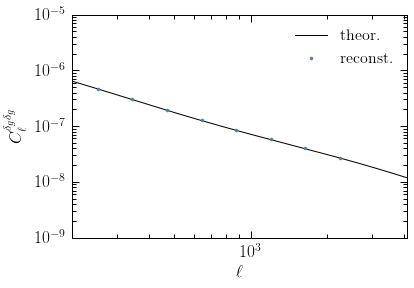

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(ells_theory, cl_gg, \
        color='k', label=r'$\mathrm{theor.}$')
ax.plot(ells_data, np.mean(cls[0,0,:,:], axis=0), \
        color=defaultcolor, label=r'$\mathrm{reconst.}$', linestyle='None', marker='.')
leg = ax.legend(loc='upper right',prop={'size':16})
leg.draw_frame(False) 
ax.set_xlim([200, 4100])
# ax.set_ylim([1e-8, 1e-5])
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$\ell$')
ax.set_ylabel(r'$C^{\delta_{g}\delta_{g}}_{\ell}$')
plt.show()

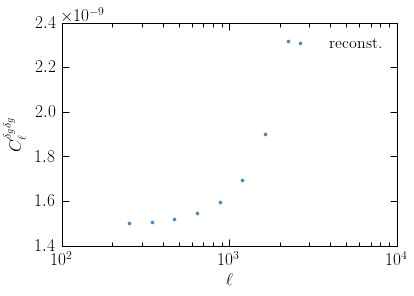

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(ells_data, np.mean(noisecls[0,0,:,:], axis=0), \
        color=defaultcolor, label=r'$\mathrm{reconst.}$', linestyle='None', marker='.')
leg = ax.legend(loc='upper right',prop={'size':16})
leg.draw_frame(False) 
# ax.set_xlim([2, 1200])
# ax.set_ylim([0, 1000])
ax.set_xscale('log')
# ax.set_yscale('log')
ax.set_xlabel(r'$\ell$')
ax.set_ylabel(r'$C^{\delta_{g}\delta_{g}}_{\ell}$')
plt.show()

Compute the covariance matrix of the reconstructed realisations:

In [11]:
deltagcov = np.cov(cls[0,0,:,:].T)/nrealis
deltagerr = np.sqrt(np.diag(deltagcov))

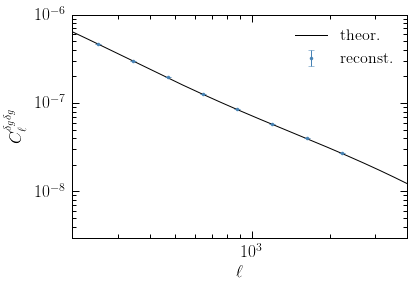

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(ells_theory, cl_gg, \
        color='k', label=r'$\mathrm{theor.}$')
ax.errorbar(ells_data, np.mean(cls[0,0,:,:], axis=0), \
            yerr=deltagerr, color=defaultcolor, \
            label=r'$\mathrm{reconst.}$', marker='.', linestyle='None')
# ax.plot(ells, ells*(ells+1)*np.mean(cls[0,0,:,:], axis=0)*(10**6)**2/(2.*np.pi), \
#         color=defaultcolor, label=r'$\mathrm{reconst.}$')
leg = ax.legend(loc='upper right',prop={'size':16})
leg.draw_frame(False) 
ax.set_xlim([200, 4000])
ax.set_ylim(3e-9, 1e-6)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$\ell$')
ax.set_ylabel(r'$C^{\delta_{g}\delta_{g}}_{\ell}$')
plt.show()

### Reconstruction of the CMB kappa power spectrum

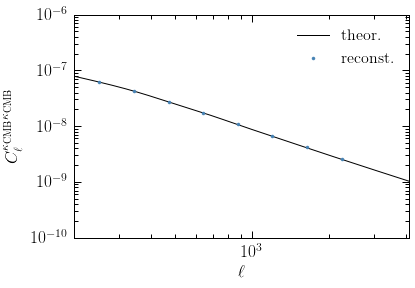

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(ells_theory, cl_kk, \
        color='k', label=r'$\mathrm{theor.}$')
ax.plot(ells_data, np.mean(cls[1,1,:,:], axis=0), \
        color=defaultcolor, label=r'$\mathrm{reconst.}$', linestyle='None', marker='.')
leg = ax.legend(loc='upper right',prop={'size':16})
leg.draw_frame(False) 
ax.set_xlim([200, 4100])
# ax.set_ylim([1e-8, 1e-5])
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$\ell$')
ax.set_ylabel(r'$C^{\kappa_{\mathrm{CMB}}\kappa_{\mathrm{CMB}}}_{\ell}$')
plt.show()

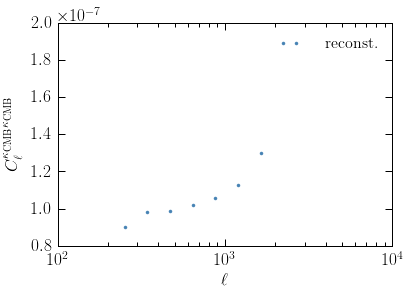

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(ells_data, np.mean(noisecls[1,1,:,:], axis=0), \
        color=defaultcolor, label=r'$\mathrm{reconst.}$', linestyle='None', marker='.')
leg = ax.legend(loc='upper right',prop={'size':16})
leg.draw_frame(False) 
# ax.set_xlim([2, 1200])
# ax.set_ylim([0, 1000])
ax.set_xscale('log')
# ax.set_yscale('log')
ax.set_xlabel(r'$\ell$')
ax.set_ylabel(r'$C^{\kappa_{\mathrm{CMB}}\kappa_{\mathrm{CMB}}}_{\ell}$')
plt.show()

In [15]:
cmbkappacov = np.cov(cls[1,1,:,:].T)/nrealis
cmbkappaerr = np.sqrt(np.diag(cmbkappacov))

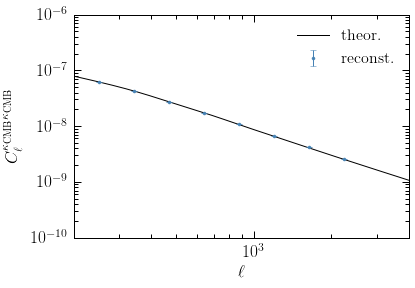

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(ells_theory, cl_kk, \
        color='k', label=r'$\mathrm{theor.}$')
ax.errorbar(ells_data, np.mean(cls[1,1,:,:], axis=0), \
            yerr=cmbkappaerr, color=defaultcolor, \
            label=r'$\mathrm{reconst.}$', marker='.', linestyle='None')
# ax.plot(ells, ells*(ells+1)*np.mean(cls[0,0,:,:], axis=0)*(10**6)**2/(2.*np.pi), \
#         color=defaultcolor, label=r'$\mathrm{reconst.}$')
leg = ax.legend(loc='upper right',prop={'size':16})
leg.draw_frame(False) 
ax.set_xlim([200, 4000])
# ax.set_ylim(3e-9, 1e-6)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$\ell$')
ax.set_ylabel(r'$C^{\kappa_{\mathrm{CMB}}\kappa_{\mathrm{CMB}}}_{\ell}$')
plt.show()

### Reconstruction of the cosmic shear power spectrum

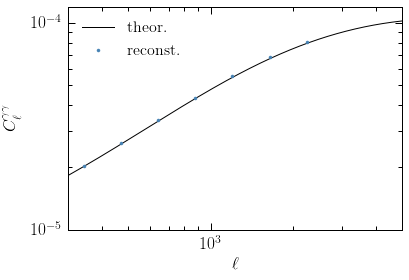

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(ells_theory, ells_theory*(ells_theory+1)*cl_ss/2./np.pi, \
        color='k', label=r'$\mathrm{theor.}$')
ax.plot(ells_data, ells_data*(ells_data+1)*np.mean(cls[2,2,:,:], axis=0)/2./np.pi, \
        color=defaultcolor, linestyle='None', marker='.', label=r'$\mathrm{reconst.}$')
leg = ax.legend(loc='upper left',prop={'size':16})
leg.draw_frame(False) 
ax.set_xlim([300, 5000])
ax.set_ylim(1e-5, 1.2e-4)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$\ell$')
ax.set_ylabel(r'$C^{\gamma \gamma}_{\ell}$')
plt.show()

Compute the covariance matrix of the reconstructed realisations:

In [18]:
gammaecov = np.cov(cls[2,2,:,:].T)/nrealis
gammaeerr = np.sqrt(np.diag(gammaecov))
gammabcov = np.cov(cls[3,3,:,:].T)/nrealis
gammaberr = np.sqrt(np.diag(gammabcov))
gammaebcov = np.cov(cls[3,2,:,:].T)/nrealis
gammaeberr = np.sqrt(np.diag(gammaebcov))

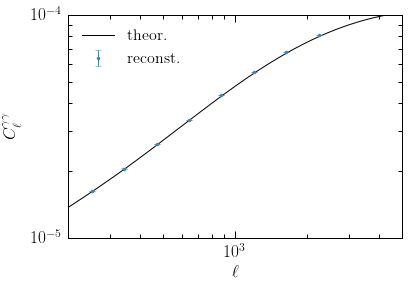

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(ells_theory, ells_theory*(ells_theory+1)*cl_ss/2./np.pi, \
        color='k', label=r'$\mathrm{theor.}$')
ax.errorbar(ells_data, ells_data*(ells_data+1)*np.mean(cls[2,2,:,:], axis=0)/2./np.pi, \
            yerr=ells_data*(ells_data+1)*gammaeerr/2./np.pi, \
        color=defaultcolor, linestyle='None', marker='.', label=r'$\mathrm{reconst.}$')
leg = ax.legend(loc='upper left',prop={'size':16})
leg.draw_frame(False) 
ax.set_xlim([200, 5000])
ax.set_ylim(1e-5, 1e-4)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$\ell$')
ax.set_ylabel(r'$C^{\gamma \gamma}_{\ell}$')
plt.show()

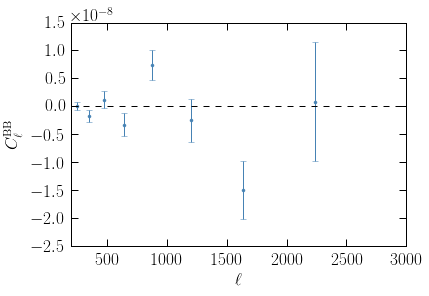

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.axhline(y=0, linestyle='--', color='k')
ax.errorbar(ells_data, ells_data*(ells_data+1)*np.mean(cls[3,3,:,:], axis=0)/2./np.pi, \
                yerr=ells_data*(ells_data+1)*gammaberr/2./np.pi, \
            color=defaultcolor, linestyle='None', marker='.', label=r'$\mathrm{reconst.}$')
# leg = ax.legend(loc='upper left',prop={'size':16})
# leg.draw_frame(False) 
ax.set_xlim([200, 3000])
# ax.set_ylim(1e-5, 1e-4)
# ax.set_xscale('log')
# ax.set_yscale('log')
ax.set_xlabel(r'$\ell$')
ax.set_ylabel(r'$C^{\mathrm{BB}}_{\ell}$')
plt.show()

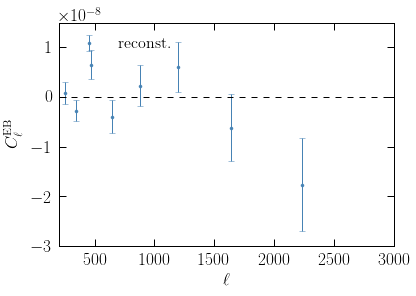

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.axhline(y=0, linestyle='--', color='k')
ax.errorbar(ells_data, ells_data*(ells_data+1)*np.mean(cls[3,2,:,:], axis=0)/2./np.pi, \
            yerr=ells_data*(ells_data+1)*gammaeberr/2./np.pi, \
        color=defaultcolor, linestyle='None', marker='.', label=r'$\mathrm{reconst.}$')
leg = ax.legend(loc='upper left',prop={'size':16})
leg.draw_frame(False) 
ax.set_xlim([200, 3000])
# ax.set_ylim(1e-5, 1e-4)
# ax.set_xscale('log')
# ax.set_yscale('log')
ax.set_xlabel(r'$\ell$')
ax.set_ylabel(r'$C^{\mathrm{EB}}_{\ell}$')
plt.show()

### Reconstruction of the galaxy density and CMB kappa power spectrum

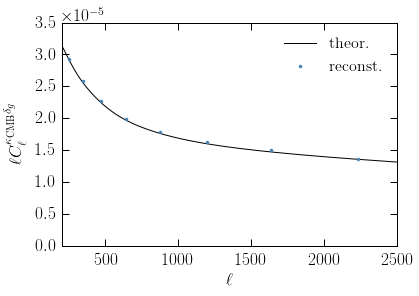

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(ells_theory, ells_theory*cl_gk, color='k', label=r'$\mathrm{theor.}$')
ax.plot(ells_data, ells_data*np.mean(cls[1,0,:,:], axis=0), \
        linestyle='None', marker='.', color=defaultcolor, label=r'$\mathrm{reconst.}$')
leg = ax.legend(loc='upper right',prop={'size':16})
leg.draw_frame(False) 
ax.set_xlim([200, 2500])
# ax.set_ylim([-1e-9, 4e-9])
# ax.set_xscale('log')
# ax.set_yscale('log')
ax.set_xlabel(r'$\ell$')
ax.set_ylabel(r'$\ell C^{\kappa_{\mathrm{CMB}}\delta_{g}}_{\ell}$')
plt.show()

In [23]:
cmbkappaxdeltagcov = np.cov(cls[1,0,:,:].T)/nrealis
cmbkappaxdeltagerr = np.sqrt(np.diag(cmbkappaxdeltagcov))

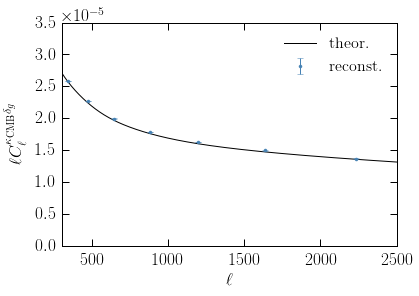

In [24]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(ells_theory, ells_theory*cl_gk, color='k', label=r'$\mathrm{theor.}$')
ax.errorbar(ells_data, ells_data*np.mean(cls[1,0,:,:], axis=0), \
            yerr=ells_data*cmbkappaxdeltagerr, \
        linestyle='None', marker='.', color=defaultcolor, label=r'$\mathrm{reconst.}$')
leg = ax.legend(loc='upper right',prop={'size':16})
leg.draw_frame(False) 
ax.set_xlim([300, 2500])
# ax.set_ylim([-1e-9, 4e-9])
# ax.set_xscale('log')
# ax.set_yscale('log')
ax.set_xlabel(r'$\ell$')
ax.set_ylabel(r'$\ell C^{\kappa_{\mathrm{CMB}}\delta_{g}}_{\ell}$')
plt.show()

### Reconstruction of the weak lensing and CMB kappa power spectrum

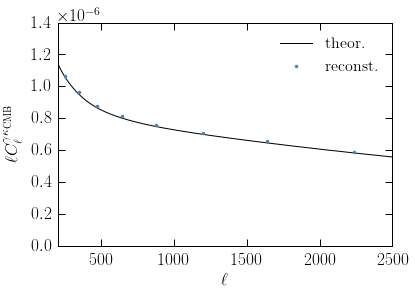

In [25]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(ells_theory, ells_theory*cl_ks, color='k', label=r'$\mathrm{theor.}$')
ax.plot(ells_data, ells_data*np.mean(cls[2,1,:,:], axis=0), \
        linestyle='None', marker='.', color=defaultcolor, label=r'$\mathrm{reconst.}$')
leg = ax.legend(loc='upper right',prop={'size':16})
leg.draw_frame(False) 
ax.set_xlim([200, 2500])
# ax.set_ylim([-1e-9, 4e-9])
# ax.set_xscale('log')
# ax.set_yscale('log')
ax.set_xlabel(r'$\ell$')
ax.set_ylabel(r'$\ell C^{\gamma\kappa_{\mathrm{CMB}}}_{\ell}$')
plt.show()

In [26]:
gammaxcmbkappacov = np.cov(cls[2,1,:,:].T)/nrealis
gammaxcmbkappaerr = np.sqrt(np.diag(gammaxcmbkappacov))

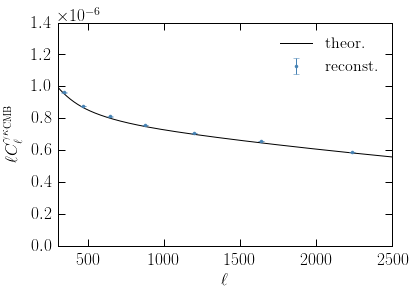

In [27]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(ells_theory, ells_theory*cl_ks, color='k', label=r'$\mathrm{theor.}$')
ax.errorbar(ells_data, ells_data*np.mean(cls[2,1,:,:], axis=0), \
            yerr=ells_data*gammaxcmbkappaerr, \
        linestyle='None', marker='.', color=defaultcolor, label=r'$\mathrm{reconst.}$')
leg = ax.legend(loc='upper right',prop={'size':16})
leg.draw_frame(False) 
ax.set_xlim([300, 2500])
# ax.set_ylim([-1e-9, 4e-9])
# ax.set_xscale('log')
# ax.set_yscale('log')
ax.set_xlabel(r'$\ell$')
ax.set_ylabel(r'$\ell C^{\gamma\kappa_{\mathrm{CMB}}}_{\ell}$')
plt.show()

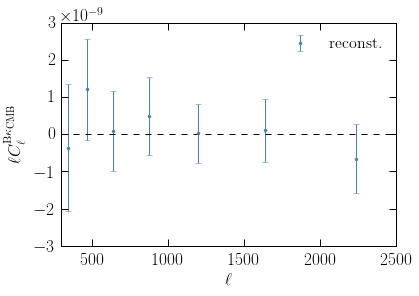

In [28]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.axhline(y=0, linestyle='--', color='k')
ax.errorbar(ells_data, ells_data*np.mean(cls[3,1,:,:], axis=0), \
            yerr=ells_data*gammaxcmbkappaerr, \
        linestyle='None', marker='.', color=defaultcolor, label=r'$\mathrm{reconst.}$')
leg = ax.legend(loc='upper right',prop={'size':16})
leg.draw_frame(False) 
ax.set_xlim([300, 2500])
# ax.set_ylim([-1e-9, 4e-9])
# ax.set_xscale('log')
# ax.set_yscale('log')
ax.set_xlabel(r'$\ell$')
ax.set_ylabel(r'$\ell C^{\mathrm{B}\kappa_{\mathrm{CMB}}}_{\ell}$')
plt.show()

### Reconstruction of the galaxy density and galaxy lensing power spectrum

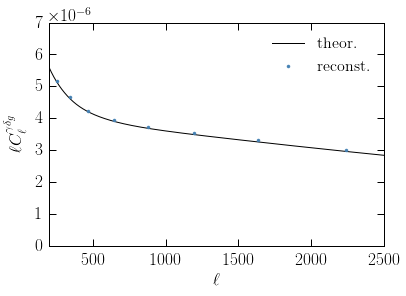

In [29]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(ells_theory, ells_theory*cl_gs, color='k', label=r'$\mathrm{theor.}$')
ax.plot(ells_data, ells_data*np.mean(cls[2,0,:,:], axis=0), \
        linestyle='None', marker='.', color=defaultcolor, label=r'$\mathrm{reconst.}$')
leg = ax.legend(loc='upper right',prop={'size':16})
leg.draw_frame(False) 
ax.set_xlim([200, 2500])
# ax.set_ylim([-1e-9, 4e-9])
# ax.set_xscale('log')
# ax.set_yscale('log')
ax.set_xlabel(r'$\ell$')
ax.set_ylabel(r'$\ell C^{\gamma\delta_{g}}_{\ell}$')
plt.show()

Compute the covariance matrix of the reconstructed realisations:

In [30]:
gammaxdeltagcov = np.cov(cls[2,0,:,:].T)/nrealis
gammaxdeltagerr = np.sqrt(np.diag(gammaxdeltagcov))

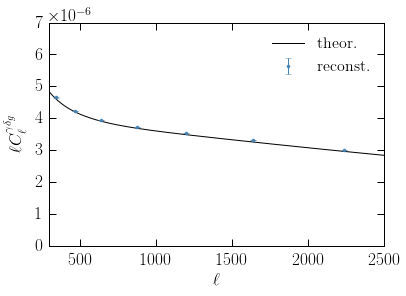

In [31]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(ells_theory, ells_theory*cl_gs, color='k', label=r'$\mathrm{theor.}$')
ax.errorbar(ells_data, ells_data*np.mean(cls[2,0,:,:], axis=0), \
            yerr=ells_data*gammaxdeltagerr, \
        linestyle='None', marker='.', color=defaultcolor, label=r'$\mathrm{reconst.}$')
leg = ax.legend(loc='upper right',prop={'size':16})
leg.draw_frame(False) 
ax.set_xlim([300, 2500])
# ax.set_ylim([-1e-9, 4e-9])
# ax.set_xscale('log')
# ax.set_yscale('log')
ax.set_xlabel(r'$\ell$')
ax.set_ylabel(r'$\ell C^{\gamma\delta_{g}}_{\ell}$')
plt.show()

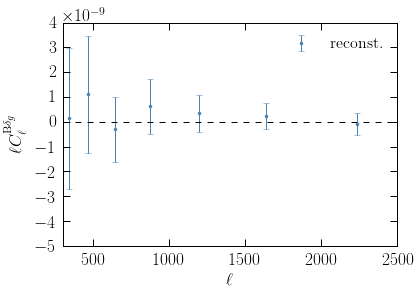

In [32]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.axhline(y=0, linestyle='--', color='k')
ax.errorbar(ells_data, ells_data*np.mean(cls[3,0,:,:], axis=0), \
            yerr=ells_data*gammaxdeltagerr, \
        linestyle='None', marker='.', color=defaultcolor, label=r'$\mathrm{reconst.}$')
leg = ax.legend(loc='upper right',prop={'size':16})
leg.draw_frame(False) 
ax.set_xlim([300, 2500])
# ax.set_ylim([-1e-9, 4e-9])
# ax.set_xscale('log')
# ax.set_yscale('log')
ax.set_xlabel(r'$\ell$')
ax.set_ylabel(r'$\ell C^{\mathrm{B}\delta_{g}}_{\ell}$')
plt.show()